############################################################################################
################## -- Programa de Especialización en Data Science Nivel I --##########################
############################################################################################

Modelos Clasificación : Regresión Logística, Regresión Logística Penalizada, Naive Bayes, K-NN.

Autores : José Cárdenas - André Chávez 

In [1]:
#######################################################################
##### Modelo de Regresión Logística y Logística Penalizada ############
#######################################################################

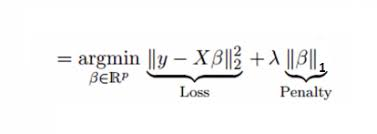

In [1]:
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

In [2]:
# Leer el dataset en un dataframe usando pandas
train = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/train.csv") 

In [3]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [6]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
train_parametrica.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,NaN,360.0,2.0,3,1
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0
2,LP001005,2.0,2.0,1.0,1,2.0,3000,0.0,66.0,360.0,2.0,3,1
3,LP001006,2.0,2.0,1.0,2,1.0,2583,2358.0,120.0,360.0,2.0,3,1
4,LP001008,2.0,1.0,1.0,1,1.0,6000,0.0,141.0,360.0,2.0,3,1


In [8]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].median())   

In [9]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [10]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

In [23]:
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), train_parametrica['Loan_Status'], test_size=0.30,
                                                   random_state=100)

In [ ]:
#######################################################################
##### Modelo de Regresión Logística Penalizada Ridge ##################
#######################################################################

In [41]:
## Paso N° 01 : Entrenar un modelo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression(penalty='l2') # Regresion Logistica Ridge
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
## Paso N° 02 : Predecir sobre la data de test con el modelo entrenado
y_pred=lr.predict(X_test)

In [27]:
## Paso N° 03 : Evaluar indicadores
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.773

	Precision: 0.763
	Recall: 0.951
	F1: 0.847



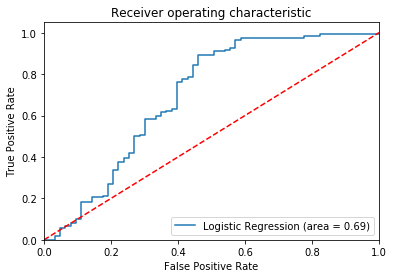

In [29]:
## Paso N° 03 : Evaluar indicadores

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
from matplotlib import pyplot as plt

lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [30]:
## Paso N° 03 : Evaluar indicadores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.43      0.56        63
          1       0.76      0.95      0.85       122

avg / total       0.78      0.77      0.75       185



In [32]:
## Paso N° 03 : Evaluar indicadores
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=400, random_state=7)
lr = LogisticRegression(penalty='l2')
scoring = 'accuracy'
results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.812


In [34]:
## Paso N° 04: Puntuamos o scoreamos sobre información nueva o clientes sin VD.
# Como ya hemos entrenado un Modelo de Clasificación , podemos trabajar con el archivo de Test
test = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/test.csv") # Leer el dataset en un dataframe usando pandas
test['Dependents'] = test['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
test['Gender'] = test['Gender'].replace({'Female': 1,'Male': 2})
test['Married'] = test['Married'].replace({'No': 1,'Yes': 2})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 1,'Yes': 2})
test['Education'] = test['Education'].replace({'Graduate': 1,'Not Graduate': 2})
test['Credit_History'] = test['Credit_History'].replace({0: 1,1: 2})
test['Property_Area'] = test['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [35]:
# Imputacion del Data Test
test_parametrica=test.copy()

In [36]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [37]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])
    
# Imputamos por las moda todas las variables cuantitativas
for column in ['LoanAmount', 'Loan_Amount_Term']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mean())  

In [38]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [39]:
# Eliminamos el ID para poder scorear o puntuar los registros
test_parametrica = test_parametrica.drop('Loan_ID', axis=1) 

In [42]:
y_final = lr.predict(test_parametrica) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
data = np.hstack((test['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Logistica001.csv', index=False)

In [43]:
## !! Listo , lo evaluamos en AnalyticsVidhya !!

In [ ]:
#######################################################################
##### Modelo de Regresión Logística Penalizada Lasso ##################
#######################################################################

In [18]:
lr2 = LogisticRegression(penalty='l1') # Regresion Logistica Lasso
lr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#######################################################################
##### Modelo de Clasificación Bayesiano : de Naive Bayes ##############
#######################################################################

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None)

In [ ]:
#######################################################################
##### Modelo de Clasificación : K-NN ##################################
#######################################################################

In [48]:
from sklearn.neighbors import KNeighborsClassifier # Cuando utilizo p=1 Manhathan, p=2 Euclídea 
neigh = KNeighborsClassifier(n_neighbors=30,algorithm='kd_tree',p=2)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')